<a href="https://colab.research.google.com/github/JimmyCarrasco/Curso_IA/blob/main/Clase_5/S_5_Regresion_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clase Anterior**

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential,layers


In [ ]:
##### Problemas de clasificacion
modelo = Sequential[(layers.Dense(512, activation = "relu",input_shape =[1600]),
                     layers.Dense(4, activation = "relu"),
                     layers.Dense(1, activation = "sigmoid")
                     )]

In [ ]:
##### Problemas de regresion
modelo = Sequential[(layers.Dense(128, activation = "relu",input_shape =[2500]),
                     layers.Dense(64, activation = "relu"),
                     layers.Dense(1, activation = None)
                     )]

**Clase Sesion_5 **

Regresion Mutiple con redes neuronales

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential,layers

In [ ]:
## Datasets son variables de filas y columnas
path = "/content/drive/MyDrive/Curso_Inteligencia_Artificial/Precio_Depas.xlsx"
df = pd.read_excel(path,'Lince') ### ruta, nombre de la hoja dentro del libro de excel
df.head()

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596


In [ ]:
dataset = df.copy()
dataset.head()

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596


In [ ]:
dataset.info()
## si el dato es texto, entonces el tipo de dato sera object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Baños        25 non-null     int64
 1   Dormitorios  25 non-null     int64
 2   Tamaño       25 non-null     int64
 3   Precio       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [ ]:
dataset = dataset.dropna()  ### Se elimina filas incompletas nula o vacia
dataset.head()

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596


dataset = (data_train (80%)    and  data_test(20%)

In [ ]:
data_train = dataset.sample(frac = 0.8, random_state = 0) #sample(muestra),se extrae el 80% de muestra de manera aleatoria
                                                          # ramdom_state = 0, crea numeros pseudoaleatorios, semilla 0
data_test = dataset.drop(data_train.index)                # drop elimina

print(data_train)
print(data_test)

    Baños  Dormitorios  Tamaño   Precio
5       2            3      61   488195
2       1            1      37   278472
19      2            3      79   655464
16      2            3      70   494760
11      2            2      58   412158
22      3            3      89   814399
17      3            3      99   762600
24      4            3     120  1068693
23      2            3      79   622690
14      2            2      64   450120
1       1            1      42   310398
10      2            2      59   427987
13      2            3      61   447142
8       1            1      39   277784
6       2            3      62   455085
18      3            4     111   840720
4       2            2      58   447596
9       1            1      40   295780
7       2            3      79   430000
20      2            3      79   671851
    Baños  Dormitorios  Tamaño  Precio
0       1            1      41  316386
3       2            2      53  444698
12      1            2      53  381728
15  

data_train (80%)    =
  data_test(20%)

In [ ]:
columns_input  = ["Baños", "Dormitorios", "Tamaño"]


columns_output = "Precio"

## Datos de entrenamiento

x_train = data_train[columns_input]
y_train = data_train[columns_output]

## Datos de testeo

x_test = data_test[columns_input]
y_test = data_test[columns_output]


In [ ]:
## Parametros estadisticos de entradas de entrenamiento
train_stats = x_train.describe()
train_stats = train_stats.transpose()
print(train_stats)

             count   mean        std   min   25%   50%   75%    max
Baños         20.0   2.05   0.759155   1.0   2.0   2.0   2.0    4.0
Dormitorios   20.0   2.45   0.887041   1.0   2.0   3.0   3.0    4.0
Tamaño        20.0  69.30  23.058507  37.0  58.0  63.0  79.0  120.0


In [ ]:
def escalar(x):
  return (x-train_stats["min"])/(train_stats["max"]-train_stats["min"])

In [ ]:
def normalizar(x):
  return (x-train_stats["mean"])/train_stats["std"]

In [ ]:
#Escalar las entradas
xe_train=escalar(x_train)
xe_test=escalar(x_test)

print(x_train)
print(xe_train)

    Baños  Dormitorios  Tamaño
5       2            3      61
2       1            1      37
19      2            3      79
16      2            3      70
11      2            2      58
22      3            3      89
17      3            3      99
24      4            3     120
23      2            3      79
14      2            2      64
1       1            1      42
10      2            2      59
13      2            3      61
8       1            1      39
6       2            3      62
18      3            4     111
4       2            2      58
9       1            1      40
7       2            3      79
20      2            3      79
       Baños  Dormitorios    Tamaño
5   0.333333     0.666667  0.289157
2   0.000000     0.000000  0.000000
19  0.333333     0.666667  0.506024
16  0.333333     0.666667  0.397590
11  0.333333     0.333333  0.253012
22  0.666667     0.666667  0.626506
17  0.666667     0.666667  0.746988
24  1.000000     0.666667  1.000000
23  0.333333     0.666667

In [ ]:
#Redes Neuronales
modelo=Sequential([
                      layers.Dense(32,activation="relu"),
                      layers.Dense(1,activation=None)

                   ])


from tensorflow.keras import optimizers

#op=optimizers.SGD(learning_rate=0.01)   #### Tener en cuenta el valor
#op=optimizers.RMSprop(0.01)
op=optimizers.Adam(0.1)       ### No existe fluctuaciones para 0.1
modelo.compile(optimizer=op,loss="mae",metrics=["mse"])

In [ ]:
hist=modelo.fit(xe_train,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 975ms/step - loss: 532594.5000 - mse: 326603702272.0000
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 532593.1250 - mse: 326602031104.0000
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 532591.4375 - mse: 326600032256.0000
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 532589.3125 - mse: 326597476352.0000
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 532586.6250 - mse: 326594297856.0000
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 532583.5000 - mse: 326590529536.0000
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 532579.6875 - mse: 326586105856.0000
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 532575.5000 - mse: 326580994048.0000
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 532570.6875 - mse: 326575226880.0000
Epoch 10/2

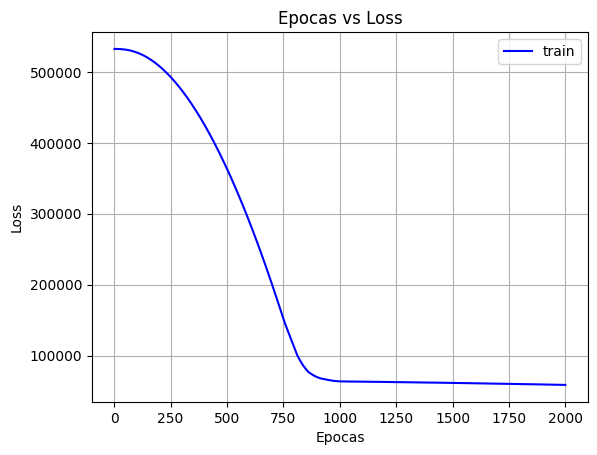

In [ ]:
loss_mae=hist.history["loss"]
loss_mse=hist.history["mse"]

epochs=range(1,len(loss_mae)+1)

plt.plot(epochs,loss_mae,"b",label="train")
plt.legend()

plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.title("Epocas vs Loss")
plt.grid()
plt.show()

In [ ]:
## Compararemos el testeo

In [ ]:
#Testeo

y_test_est=modelo.predict(xe_test)

df_ytest=pd.DataFrame({"Reales":y_test})
df_ytest["Estimados"]=y_test_est

print("Salidas de testeo:\n",df_ytest)

1/1 [==============================] - 0s 46ms/step
Salidas de testeo:
     Reales     Estimados
0   316386  264735.09375
3   444698  444855.25000
12  381728  364499.53125
15  433380  475576.21875
21  795890  706897.93750


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_real=df_ytest["Reales"]
y_est=df_ytest["Estimados"]

mae_test=mean_absolute_error(y_real,y_est)
mse_test=mean_squared_error(y_real,y_est)
r2_test=r2_score(y_real,y_est)

print("MAE_test: ",mae_test)
print("MSE_test: ",mse_test)
print("r2_test: ",r2_test)

MAE_test:  40044.98125
MSE_test:  2532953808.856055
r2_test:  0.909198279042201


In [ ]:
#Predicción
x_new=pd.DataFrame({"Baños":[1],
                    "Dormitorios":[2],
                    "Tamaño":[71]})

xe_new=escalar(x_new)
y_pred=modelo.predict(xe_new)

print("Datos:\n",x_new)
print("Predicción:",y_pred)

1/1 [==============================] - 0s 21ms/step
Datos:
    Baños  Dormitorios  Tamaño
0      1            2      71
Predicción: [[425941.4]]
